# Twenty Newsgroups Text Classifier

Author: Greg Strabel

The purpose of this notebook is to demonstrate a few common machine learning algorithms for text classification, in particular:
1. Ensembled Support Vector Classifiers
2. Gaussian Naive Bayes
3. Feedforward Neural Network

The Twenty Newsgroups dataset is a collection of ~18,000 newsgroup posts on 20 subjects. It is one of the most popular datasets for evaluating text classifiers. To learn more about the specific version we use, see [here](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# import 20newsgroups dataset and remove headers, footers and quotes
from sklearn.datasets import fetch_20newsgroups
from sklearn.utils import shuffle
newsgroups_train = fetch_20newsgroups(subset='train',
                remove = ('headers','footers','quotes'))
newsgroups_train_features, newsgroups_train_targets = shuffle(newsgroups_train.data, newsgroups_train.target)

newsgroups_test = fetch_20newsgroups(subset='test',
                remove = ('headers','footers','quotes'))

newsgroups_test_features, newsgroups_test_targets = shuffle(newsgroups_test.data, newsgroups_test.target)

print('An example of one of the posts:\n\n\n',newsgroups_train_features[0])

An example of one of the posts:


 
As one of the "Clintonites" cited above, I'll try to clarify since this
is not a case of Clinton's "dishonesty." (I won't necessarily defend him
on other issues.)  

There were NEVER any specific projects included in the Community
Development Block Grant portion of the President's proposal.  Congressional
Republicans, in an effort to discredit the stimulus package, selected what
they felt were silly sounding projects from a wish-list of POTENTIAL 
projects prepared by the US Mayors' Conference before the stimulus package
was ever proposed.  (The document in question was designed to pressure the
White House to increase the size of the block grant proposal submitted
to Congress.  It didn't work.)

The $2.56(?) billion proposed in the stimulus package came nowhere close
to covering the total estimated cost of the original wish-list.  If it
were passed, communities would have to select which projects to fund and
at what level.

In the case of Spokane, Wa

Next I construct a vocabulary using term-frequency inverse-document-frequency vectorizing:

In [2]:
# Construct vocabulary using
# term-frequency inverse-document-frequency vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

VOCAB_SIZE = 1000

vectorizer = TfidfVectorizer(max_features = VOCAB_SIZE,
                             token_pattern = '(?u)\\b\\w+\\b',
                             stop_words = 'english'
                            )

# Construct corpus and target
limit_samples = 10000
train_corpus = newsgroups_train_features[0:limit_samples]
train_target = newsgroups_train_targets[0:limit_samples]
test_corpus = newsgroups_test_features[0:limit_samples]
test_target = newsgroups_test_targets[0:limit_samples]
X_train = vectorizer.fit_transform(train_corpus)
X_test = vectorizer.transform(test_corpus)

analyzer = vectorizer.build_analyzer()

In [3]:
analyzed_data_train = list(map(analyzer,train_corpus))
analyzed_data_test = list(map(analyzer,test_corpus))

Let's take a look at the tokens that remain after lowercasing and stripping English stopwords from the first newsgroup message:

In [4]:
print('The tokens that remain after lowercasing and stripping English stopwords from the first newsgroup message:',
      '\n\n',
      ', '.join(analyzed_data_train[0]))

The tokens that remain after lowercasing and stripping English stopwords from the first newsgroup message: 

 clintonites, cited, ll, try, clarify, case, clinton, s, dishonesty, won, t, necessarily, defend, issues, specific, projects, included, community, development, block, grant, portion, president, s, proposal, congressional, republicans, effort, discredit, stimulus, package, selected, felt, silly, sounding, projects, wish, list, potential, projects, prepared, mayors, conference, stimulus, package, proposed, document, question, designed, pressure, white, house, increase, size, block, grant, proposal, submitted, congress, didn, t, work, 2, 56, billion, proposed, stimulus, package, came, close, covering, total, estimated, cost, original, wish, list, passed, communities, select, projects, fund, level, case, spokane, wa, tom, foley, s, home, district, expected, able, refurbish, local, swimming, pool, republicans, examples, funds, available, stimulus, package, estimated, cost, doing, exc

Now we encode the posts using the tf-idf vectorizer and take a glimpse at the first post again:

In [5]:
def vocab_encoder(tokens, vocab):
    l = []
    for word in tokens:
        try:
            l.append(vocab[word])
        except:
            l.append(-1)
    return l
    
encoded_tokenized_data_train = list(
        map(lambda x: vocab_encoder(x,vectorizer.vocabulary_),
            analyzed_data_train)
        )

encoded_tokenized_data_test = list(
        map(lambda x: vocab_encoder(x,vectorizer.vocabulary_),
            analyzed_data_test)
        )

# The document above after encoding with the tf-idf vectorizer
print('The first newsgroup message after stripping English stopwords, applying the tf-idf vectorizer and encoding:',
      '\n\n',
      ', '.join([str(i) for i in encoded_tokenized_data_train[0]]))

The first newsgroup message after stripping English stopwords, applying the tf-idf vectorizer and encoding: 

 -1, -1, 552, 910, -1, 202, 232, 781, -1, 977, 871, -1, -1, 499, 844, -1, 477, 246, 303, 170, -1, -1, 708, 781, -1, -1, -1, -1, -1, -1, 660, -1, -1, -1, -1, -1, 973, 546, -1, -1, -1, -1, 253, -1, 660, -1, -1, 733, 301, -1, 966, 463, -1, 827, 170, -1, -1, -1, 254, 307, 871, 980, 28, -1, -1, -1, -1, 660, 194, 234, -1, 904, -1, 265, 655, 973, 546, -1, -1, -1, -1, -1, 537, 202, -1, -1, -1, -1, 781, 461, -1, -1, 87, -1, 553, -1, -1, -1, -1, -1, 145, -1, 660, -1, 265, 322, -1, 904, 170, -1, -1, 226, -1, -1, 660, -1, 687, 486, 928, 607, 728, -1, -1, -1, -1, -1, -1, -1, -1, 686, 908, -1, -1, -1, 623, 555, 546, -1, -1, 226, 43, 601, 748, 271, -1, -1, 170, -1, 279, -1, 660, -1, -1, -1, -1, 232, 98, -1, 498, 384, 692, 541, 246, 170, -1, 984, -1, -1, -1, -1, 630, -1, 98, -1, 410, -1, -1, -1, -1, 378, -1, -1, 553, -1, 372, 160, 87, -1, -1, -1, 956, -1, 230, -1, 920, -1


In [6]:
def count_values_in_list(l,v):
    '''
    A function to count occurrences
    of an item v in a list l
    '''
    _ = []
    for i in v:
        _.append(l.count(i))
    return _

encoded_tokenized_data_train_cnts = np.array([count_values_in_list(
        encoded_tokenized_data_train[i],
        np.arange(-1,VOCAB_SIZE))
    for i in range(len(encoded_tokenized_data_train))])

encoded_tokenized_data_test_cnts = np.array([count_values_in_list(
        encoded_tokenized_data_test[i],
        np.arange(-1,VOCAB_SIZE))
    for i in range(len(encoded_tokenized_data_test))])
    
from sklearn.preprocessing import MaxAbsScaler
# Scale data
max_abs_scaler = MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(
        encoded_tokenized_data_train_cnts)
X_test_scaled = max_abs_scaler.transform(
        encoded_tokenized_data_test_cnts)

The first text classifier I construct is an ensemble of Support Vector Classifiers:

In [7]:
# Support Vector Classifier:
# The computational complexity of SVMs grow between O(n_features x n_samples^) and O(n_features x n_samples^3)
# Rather than fit one SVM classifier, I train an ensemble of SVM classifiers on subsets of the data and distribute
# the training over multiple processors
# Note: sklearn.ensemble.BaggingClassifier does not work properly when splitting the data
# and running jobs on multiple processors if some of the partitions of the training data do not contain all classes
# See the issue raised here: https://github.com/scikit-learn/scikit-learn/issues/8409
# Have to spin up multiple jobs using multiprocess pooling (starmap allows you to provide datasets as an iterable)
from sklearn.svm import SVC
from multiprocessing import Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

n_splits = 5 # number of SVMs


skf = StratifiedKFold(n_splits = n_splits, random_state = 0)
indices = [j for i,j in skf.split(X_train_scaled,train_target)]
X_train_datasets = [(i,j) for i,j in zip(
        (X_train_scaled[k,:] for k in indices),
         (train_target[k] for k in indices))]
pool = Pool(n_splits)
results = pool.starmap(
        OneVsRestClassifier(
                SVC(probability = True)
                ).fit,X_train_datasets)
outcomes = [result for result in results]

def predict_proba(data,models):
    '''
    Takes a dataset and list of models that have predict_proba method and
    returns DataFrame with average value of predict_proba for each class
    '''
    preds = [pd.DataFrame(model.predict_proba(data),
                          columns = model.classes_)
                          for model in models]
    classes = set(sum([model.classes_.tolist() for model in models],[]))
    d = pd.DataFrame()
    for c in classes:
        c_sum = 0
        for p in preds:
            if c in p.columns:
                c_sum += p[c].values
        d[c] = c_sum / len(preds)
    return d[sorted(list(classes))]

svm_predict_proba = predict_proba(X_test_scaled,outcomes).values

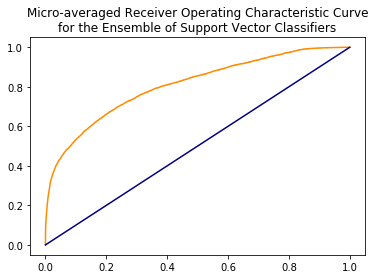

Classification Report for Ensemble of Support Vector Classifiers: 
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.05      0.09       319
           comp.graphics       0.82      0.12      0.21       389
 comp.os.ms-windows.misc       0.80      0.20      0.31       394
comp.sys.ibm.pc.hardware       0.54      0.28      0.37       392
   comp.sys.mac.hardware       0.15      0.65      0.24       385
          comp.windows.x       0.58      0.37      0.46       395
            misc.forsale       0.45      0.80      0.57       390
               rec.autos       0.31      0.44      0.37       396
         rec.motorcycles       0.56      0.31      0.40       398
      rec.sport.baseball       0.17      0.49      0.25       397
        rec.sport.hockey       0.59      0.61      0.60       399
               sci.crypt       0.58      0.47      0.52       396
         sci.electronics       0.29      0.24      0.26       393
        

In [8]:
fpr, tpr, _ = roc_curve(
        (np.unique(test_target) == test_target[:,None]).astype(int).ravel(),
         svm_predict_proba.ravel())

plt.figure()
plt.plot(fpr,tpr, color = 'darkorange')
plt.plot([0,1],[0,1], color = 'navy')
plt.title('Micro-averaged Receiver Operating Characteristic Curve\nfor the Ensemble of Support Vector Classifiers')
plt.show()
prediction = svm_predict_proba.argmax(axis=1)
print("Classification Report for Ensemble of Support Vector Classifiers: \n%s\n"
      % (classification_report(test_target,prediction,target_names = newsgroups_train.target_names)))

Next we fit a Gaussian Naive Bayes Classifier:

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train_scaled, train_target).predict(X_test_scaled)
gnb_pred = gnb.predict(X_test_scaled)
gnb_pred_proba = gnb.predict_proba(X_test_scaled)

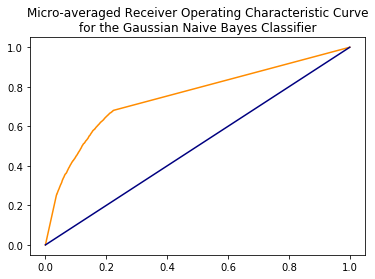

Classification Report for Gaussian Naive Bayes Classifier: 
                          precision    recall  f1-score   support

             alt.atheism       0.20      0.34      0.25       319
           comp.graphics       0.31      0.25      0.27       389
 comp.os.ms-windows.misc       0.23      0.02      0.04       394
comp.sys.ibm.pc.hardware       0.31      0.33      0.32       392
   comp.sys.mac.hardware       0.17      0.60      0.27       385
          comp.windows.x       0.46      0.18      0.26       395
            misc.forsale       0.58      0.27      0.36       390
               rec.autos       0.35      0.17      0.23       396
         rec.motorcycles       0.30      0.39      0.34       398
      rec.sport.baseball       0.14      0.71      0.24       397
        rec.sport.hockey       0.40      0.28      0.33       399
               sci.crypt       0.67      0.34      0.45       396
         sci.electronics       0.34      0.08      0.13       393
               

In [10]:
fpr, tpr, _ = roc_curve(
        (np.unique(test_target) == test_target[:,None]).astype(int).ravel(),
         gnb_pred_proba.ravel())

plt.figure()
plt.plot(fpr,tpr, color = 'darkorange')
plt.plot([0,1],[0,1], color = 'navy')
plt.title('Micro-averaged Receiver Operating Characteristic Curve\nfor the Gaussian Naive Bayes Classifier')
plt.show()

print("Classification Report for Gaussian Naive Bayes Classifier: \n%s\n"
      % (classification_report(test_target,gnb_pred,target_names = newsgroups_train.target_names)))

Lastly we fit a Feedforward Neural Network with two hidden layers:

In [11]:
# Using keras with TensorFlow backend
import keras
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [13]:
inputs = Input(shape = (X_train_scaled.shape[1],))
Layer1 = Dense(32,activation = 'sigmoid')(inputs)
Layer2 = Dense(32, activation = 'sigmoid')(Layer1)
out = Dense(20, activation = 'sigmoid')(Layer2)

earlyStoppingCriteria = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto')

FFNN = Model(inputs, out)
FFNN.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

FFNN.fit(X_train_scaled,
         (np.unique(train_target) == train_target[:,None]).astype(int),
         epochs=500,
         batch_size=1000,
         verbose=0, # might want to change this to 1 when running the notebook yourself in order to track progress
         callbacks = [earlyStoppingCriteria],
         validation_data = (
           X_test_scaled,
           (np.unique(test_target) == test_target[:,None]).astype(int)
         )
        )

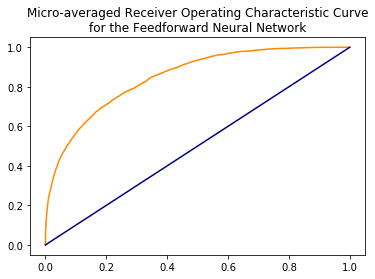

Classification Report for Feedforward Neural Network: 
                          precision    recall  f1-score   support

             alt.atheism       0.23      0.28      0.25       319
           comp.graphics       0.38      0.37      0.38       389
 comp.os.ms-windows.misc       0.44      0.45      0.44       394
comp.sys.ibm.pc.hardware       0.46      0.39      0.42       392
   comp.sys.mac.hardware       0.45      0.44      0.44       385
          comp.windows.x       0.50      0.45      0.47       395
            misc.forsale       0.71      0.68      0.69       390
               rec.autos       0.45      0.47      0.46       396
         rec.motorcycles       0.27      0.50      0.35       398
      rec.sport.baseball       0.39      0.45      0.42       397
        rec.sport.hockey       0.63      0.57      0.60       399
               sci.crypt       0.59      0.54      0.56       396
         sci.electronics       0.35      0.31      0.33       393
                 sci

In [14]:
FFNN_pred_proba = FFNN.predict(X_test_scaled)
FFNN_pred = FFNN_pred_proba.argmax(axis=1)

fpr, tpr, _ = roc_curve(
        (np.unique(test_target) == test_target[:,None]).astype(int).ravel(),
         FFNN_pred_proba.ravel())

plt.figure()
plt.plot(fpr,tpr, color = 'darkorange')
plt.plot([0,1],[0,1], color = 'navy')
plt.title('Micro-averaged Receiver Operating Characteristic Curve\nfor the Feedforward Neural Network')
plt.show()

print("Classification Report for Feedforward Neural Network: \n%s\n"
      % (classification_report(test_target,FFNN_pred,target_names = newsgroups_train.target_names)))

Although the Ensemble of Support Vector Classifiers had impressive overall precision, its recall was significantly worse than that of the Feedforward Neural Network. Therefore, if I were to select a model based on average f1-score, I would select the Feedforward Neural Network.